Top 10K Artisti negli Stati Uniti e le loro canzoni più famose

Per questo progetto abbiamo selezionato un dataset formato da 2 file csv. Essi raccolgono collettivamente i dati sulle 10 canzoni più popolari di ciascuno dei 10.000 artisti più ascoltati negli Stati Uniti.
Questo set di dati copre un'ampia gamma di generi musicali e un determinato periodo di tempo, catturando i gusti dinamici degli appassionati di musica nel paese.

Prima di iniziare, importiamo le librerie che andremo ad utilizzare

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importiamo ora i file csv che compongono il dataset che analizzeremo

Importiamo il primo file contenente i dati relativi agli artisti. Lo andiamo a salvare in una variabile chiamata 'artisti'

In [2]:
artisti = pd.read_csv('Artists.csv', sep=',')

Osserviamo una 'preview' dei dati che 'artisti' contiene con il metodo 'head'

In [3]:
artisti.head()

,Name,ID,Gender,Age,Country,Genres,Popularity,Followers,URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,spotify:artist:246dkjvS1zLTtiykXe5h60
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,spotify:artist:4q3ewBCX7sLwd24euuV69X


Importiamo il secondo file contenente i dati relativi alle canzoni degli artisti. Salviamolo in una variabile chiamata 'top_songs' ed osserviamo una 'preview' dei dati che contiene con il metodo usato precedentemente

In [3]:
top_songs = pd.read_csv('Top_Songs_US.csv', sep=',')

In [6]:
top_songs.head()

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity,Track Id,Track URI
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU
2,album,3TVXtAsR1Inumwj472S9r4,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),True,For All The Dogs,2023-10-06,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
3,album,3TVXtAsR1Inumwj472S9r4,Drake,4,Jimmy Cooks (feat. 21 Savage),True,"Honestly, Nevermind",2022-06-17,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe
4,album,3TVXtAsR1Inumwj472S9r4,Drake,5,One Dance,True,Views,2016-05-06,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0


Ora visualizziamo il tipo dei dati presenti nei file utilizzando il metodo 'info'. Esso è comunemente usato per ottenere informazioni sul tipo di dati di ogni colonna del dataset. Si possono inoltre controllare valori come la presenza di valori null e l'utilizzo di memoria. 
È cruciale ricevere informazioni sul tipo di dati che il dataset contiene in modo da comprendere al meglio come trattare e processare i dati.

In [4]:
artisti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9488 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9488 non-null   object
 1   ID          9488 non-null   object
 2   Gender      7829 non-null   object
 3   Age         9488 non-null   int64 
 4   Country     6305 non-null   object
 5   Genres      9488 non-null   object
 6   Popularity  9488 non-null   int64 
 7   Followers   9488 non-null   int64 
 8   URI         9488 non-null   object
dtypes: int64(3), object(6)
memory usage: 667.3+ KB


Dalla precedente operazione, osserviamo che su 9488 valori per ciascuna colonna, nelle colonne 'Gender' e 'Country' il numero dei valori non-null è più basso. Ciò significa che sono presenti valori null (NaN). Procediamo dunque ad eliminarli con il metodo 'dropna'.

Eseguiamo il metodo su tutto il file degli artisti. In questo modo, i dati risultano maggiormente rappresentativi.

In [4]:
artisti_no_nan = artisti.dropna()

Verifichiamo che l'operazione sia andata a buon fine

In [5]:
artisti_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        6126 non-null   object
 1   ID          6126 non-null   object
 2   Gender      6126 non-null   object
 3   Age         6126 non-null   int64 
 4   Country     6126 non-null   object
 5   Genres      6126 non-null   object
 6   Popularity  6126 non-null   int64 
 7   Followers   6126 non-null   int64 
 8   URI         6126 non-null   object
dtypes: int64(3), object(6)
memory usage: 478.6+ KB


Notiamo che il numero dei valori non-null in ciascuna colonna è ora uguale per tutte le colonne. Ciò significa che i valori NaN nelle colonne 'Country' e 'Gender' sono stati rimossi, e con loro l'intera riga in cui erano contenuti. In questo modo, gli artisti che contenevano informazioni mancanti non verranno presi in considerazione.

Eseguiamo ora l'analisi del tipo dei dati del file 'top_songs' utilizzando il metodo 'info'

In [7]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37146 entries, 0 to 37145
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Album Type          37146 non-null  object
 1   Artist ID           37146 non-null  object
 2   Artist Name         37146 non-null  object
 3   Artist Song Rank    37146 non-null  int64 
 4   Track Name          37146 non-null  object
 5   Is Playable         37146 non-null  bool  
 6   Album Name          37146 non-null  object
 7   Release Date        37146 non-null  object
 8   Total Album Tracks  37146 non-null  int64 
 9   Is Explicit         37146 non-null  bool  
 10  ISRC                37146 non-null  object
 11  Song Duration       37146 non-null  int64 
 12  Track Number        37146 non-null  int64 
 13  Popularity          37146 non-null  int64 
 14  Track Id            37146 non-null  object
 15  Track URI           37146 non-null  object
dtypes: bool(2), int64(5), 

Notiamo che non ci sono colonne che presentano valori null, poichè il valore dei dati non-null risulta essere 37146 per ciascuna.

Osserviamo però che il tipo della colonna 'Release Date' non risulta essere corretto. Esso infatti è un object, dunque andiamo a convertirlo in tipo datetime.

In [5]:
top_songs['Release Date'] = pd.to_datetime(top_songs['Release Date'], utc=True).dt.tz_convert('Europe/Berlin')

Verifichiamo che il tipo della colonna 'Release Date' sia stato correttamente convertito

In [13]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37146 entries, 0 to 37145
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype                        
---  ------              --------------  -----                        
 0   Album Type          37146 non-null  object                       
 1   Artist ID           37146 non-null  object                       
 2   Artist Name         37146 non-null  object                       
 3   Artist Song Rank    37146 non-null  int64                        
 4   Track Name          37146 non-null  object                       
 5   Is Playable         37146 non-null  bool                         
 6   Album Name          37146 non-null  object                       
 7   Release Date        37146 non-null  datetime64[ns, Europe/Berlin]
 8   Total Album Tracks  37146 non-null  int64                        
 9   Is Explicit         37146 non-null  bool                         
 10  ISRC                37146 non-null

Osserviamo come è cambiata la colonna 'Release Date'

In [14]:
top_songs.head()

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity,Track Id,Track URI
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU
2,album,3TVXtAsR1Inumwj472S9r4,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),True,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
3,album,3TVXtAsR1Inumwj472S9r4,Drake,4,Jimmy Cooks (feat. 21 Savage),True,"Honestly, Nevermind",2022-06-17 02:00:00+02:00,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe
4,album,3TVXtAsR1Inumwj472S9r4,Drake,5,One Dance,True,Views,2016-05-06 02:00:00+02:00,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0


-----------------------------------------------------------------------

Controlliamo se i due file contengono valori duplicati utilizzando il metodo 'duplicated' e un check per verificare in caso dove sono collocati. Cominciamo con il primo file

In [6]:
check = artisti.duplicated()

if check.any():
    duplicate_rows = artisti[check]
    print("Righe duplicate trovate:")
    print(duplicate_rows)
else:
    print("Nessuna riga duplicata trovata")

Nessuna riga duplicata trovata


Osserviamo che il file degli artisti non contiene valori duplicati. Analizziamo il secondo utilizzando lo stesso metodo e un check

In [7]:
check_2 = top_songs.duplicated()

if check_2.any():
    duplicate_rows_2 = top_songs[check_2]
    print("Righe duplicate trovate:")
    print(duplicate_rows_2)
else:
    print("Nessuna riga duplicata trovata")

Righe duplicate trovate:
      Album Type               Artist ID Artist Name  Artist Song Rank  \
4034       album  3TVXtAsR1Inumwj472S9r4       Drake                 1   
4035       album  3TVXtAsR1Inumwj472S9r4       Drake                 2   
4036       album  3TVXtAsR1Inumwj472S9r4       Drake                 3   
4037       album  3TVXtAsR1Inumwj472S9r4       Drake                 4   
4038       album  3TVXtAsR1Inumwj472S9r4       Drake                 5   
...          ...                     ...         ...               ...   
37141      album  5LHRHt1k9lMyONurDHEdrp        Tyga                 6   
37142      album  5LHRHt1k9lMyONurDHEdrp        Tyga                 7   
37143      album  5LHRHt1k9lMyONurDHEdrp        Tyga                 8   
37144     single  5LHRHt1k9lMyONurDHEdrp        Tyga                 9   
37145     single  5LHRHt1k9lMyONurDHEdrp        Tyga                10   

                                    Track Name  Is Playable  \
4034                   

Dall'output ottenuto notiamo la presenza di diverse righe duplicate. Andiamo ad eliminarle utilizzando il metodo 'drop_duplicates' e salviamo il contenuto in una variabile.

Eliminare i valori duplicati può essere fondamentale per poter assicurare la precisione del dataset. I valori duplicati, o in questo caso le righe, possono distorcere le analisi statistiche e introdurre discrepanze, oltre a causare ripetizioni superflue e un maggior consumo di memoria.

In [8]:
top_songs_unique = top_songs.drop_duplicates(subset=['Artist ID', 'Track Id'])

Verifichiamo che l'operazione precedente sia andata a buon fine utilizzando lo stesso metodo e il check

In [9]:
check_unique = top_songs_unique.duplicated()

if check_unique.any():
    duplicate_rows_unique = top_songs_unique[check_unique]
    print("Righe duplicate trovate:")
    print(duplicate_rows_unique)
else:
    print("Nessuna riga duplicata trovata")

Nessuna riga duplicata trovata


Concludiamo la sezione dedicata alle operazioni preliminari e cominciamo l'analisi vera e propria del dataset

------------------------------------------------------------------

Per prima cosa, eseguiamo il merge dei due file tramite l'ID dell'artista, essendo un valore comune. Visto che la colonna relativa all'ID dell'artista presenta un nome diverso in ciascun file, utilizziamo i parametri 'left_on' e 'right_on' per specificare il nome corretto.

'ID' è il nome della colonna relativa all'ID dell'artista nel file degli artisti, mentre 'Artist ID' è il nome della medesima colonna ma all'interno del file delle top songs

In [10]:
merged_dataset = pd.merge(artisti_no_nan, top_songs_unique, left_on='ID', right_on='Artist ID')

Visualizziamo il contenuto del merge

In [20]:
merged_dataset

,Name,ID,Gender,Age,Country,Genres,Popularity_x,Followers,URI,Album Type,...,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity_y,Track Id,Track URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU
2,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06 02:00:00+02:00,23,True,USUG12306085,319191,20,89,1yeB8MUNeLo9Ek1UEpsyz6,spotify:track:1yeB8MUNeLo9Ek1UEpsyz6
3,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,"Honestly, Nevermind",2022-06-17 02:00:00+02:00,14,True,USUG12204897,218364,14,89,3F5CgOj3wFlRv51JsHbxhe,spotify:track:3F5CgOj3wFlRv51JsHbxhe
4,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,Views,2016-05-06 02:00:00+02:00,20,False,USCM51600028,173986,12,89,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,Gillian Welch,2H5elA2mJKrHmqkN9GSfkz,male,28,DK,"['alternative country', 'canadian singer-songw...",47,220293,spotify:artist:2H5elA2mJKrHmqkN9GSfkz,album,...,The Harrow & The Harvest,2011-06-28 02:00:00+02:00,10,False,US2AR1110904,241957,4,42,6jx8L9ng94zKcw4xbbQFjC,spotify:track:6jx8L9ng94zKcw4xbbQFjC
3524,Gillian Welch,2H5elA2mJKrHmqkN9GSfkz,male,28,DK,"['alternative country', 'canadian singer-songw...",47,220293,spotify:artist:2H5elA2mJKrHmqkN9GSfkz,album,...,Revival,1996-04-09 02:00:00+02:00,10,False,USAL19600602,243866,2,40,3ZtC9ZDhPJj0E043tmlOgx,spotify:track:3ZtC9ZDhPJj0E043tmlOgx
3525,Gillian Welch,2H5elA2mJKrHmqkN9GSfkz,male,28,DK,"['alternative country', 'canadian singer-songw...",47,220293,spotify:artist:2H5elA2mJKrHmqkN9GSfkz,album,...,Boots No. 1: The Official Revival Bootleg,2016-11-25 01:00:00+01:00,21,False,US2AR1660117,175083,7,40,0ddo16GDbp9RoNzT285C4R,spotify:track:0ddo16GDbp9RoNzT285C4R
3526,Gillian Welch,2H5elA2mJKrHmqkN9GSfkz,male,28,DK,"['alternative country', 'canadian singer-songw...",47,220293,spotify:artist:2H5elA2mJKrHmqkN9GSfkz,album,...,Time (The Revelator),2001-07-31 02:00:00+02:00,10,False,US2AR0110301,382560,1,39,4Ui86NRu1aoBGRUJyPusp6,spotify:track:4Ui86NRu1aoBGRUJyPusp6


Dall'output ottenuto notiamo che la colonna 'Popularity' ha assunto 2 nomi diversi per poter essere identificata correttamente. Visto che questa colonna presenta lo stesso nome in entrambi i file ma assume diversi valori e significati, sono stati aggiunti dei suffissi per poterle distinguere. 
La colonna 'Popularity_x' fa riferimento alla popolarità degli artisti del primo file, mentre la seconda colonna, chiamata 'Popularity_y', fa riferimento alla popolarità delle canzoni per ciascun artista del secondo file.

Di seguito creiamo un file csv contenente il merge dei due file 'artisti' e 'top_songs' per poter osservare più chiaramente il contenuto in un unico file. 
Essendo l'unione del file 'artisti' che non presenta valori null e del file 'top songs' privo di duplicati, questo merge non contiene valori Nan e valori duplicati. 

Utilizziamo il metodo 'to_csv'

In [22]:
merged_dataset.to_csv('Merge.csv', index=False)

Iniziamo l'analisi del dataset identificando il genere musicale più popolare.

Per prima cosa, identifichiamo quale genere musicale degli artisti è il più famoso.
Dunque, raggruppiamo per genere ed eseguiamo la somma della popolarità per ciascun genere

In [11]:
# popolarità dell'artista 'Popularity_x'

artist_popularity = merged_dataset.groupby('Genres')['Popularity_x'].sum()

Di seguito, identifichiamo quale genere musicale delle canzoni è il più famoso. Dunque, raggruppiamo per genere ed eseguiamo la somma della popolarità per ciascun genere

In [12]:
# popolarità delle canzoni 'Popularity_y'

song_popularity = merged_dataset.groupby('Genres')['Popularity_y'].sum()

Visualizziamo i risultati che salviamo dentro a delle variabili. Utilizziamo il metodo 'idxmax' che riporta la label della riga del valore massimo.

In [13]:
# visualizziamo il genere dell'artista più ascoltato/popolare
most_listened_artist_genre = artist_popularity.idxmax()
most_listened_artist_genre

"['pop']"

In [14]:
# visualizziamo il genere delle canzoni più ascoltate/popolari
most_listened_song_genre = song_popularity.idxmax()
most_listened_song_genre

"['pop']"

Osserviamo dunque che il genere più popolare è il pop, sia per quanto riguarda gli artisti che le canzoni. Ma è sempre stato così? Il pop è sempre stato il genere musicale più famoso? Lo analizzeremo più avanti. Vediamo ora nel dettaglio gli artisti più popolari e di quali generi musicali fanno parte, per osservare se insieme al popo sono presenti altri generi famosi.

Analizziamo ora l'artista più famoso

In [15]:
popolarità_artista = merged_dataset.groupby(['ID', 'Name', 'Gender', 'Genres'])['Popularity_x'].sum()

most_popular_artist = popolarità_artista.idxmax()
most_popular_artist

('06HL4z0CvFAxyc27GXpf02', 'Taylor Swift', 'female', "['pop']")

Dall'output ottenuto vediamo Taylor Swift come artista più popolare. Chi altro presenta una popolarità elevata? 

In [28]:
# ora osserviamo la top 5 artisti più famosi
top_5_artists = popolarità_artista.nlargest(5)
top_5_artists

ID                      Name          Gender  Genres                                                           
06HL4z0CvFAxyc27GXpf02  Taylor Swift  female  ['pop']                                                              1000
3TVXtAsR1Inumwj472S9r4  Drake         male    ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']     950
4q3ewBCX7sLwd24euuV69X  Bad Bunny     male    ['reggaeton', 'trap latino', 'urbano latino']                         950
1Xyo4u8uXC1ZmMpatF05PJ  The Weeknd    male    ['canadian contemporary r&b', 'canadian pop', 'pop']                  930
0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott  male    ['hip hop', 'rap', 'slap house']                                      900
Name: Popularity_x, dtype: int64

Ampliamo ulteriormente l'output

In [29]:
top_10_with_genre = popolarità_artista.nlargest(10)
top_10_with_genre

ID                      Name           Gender  Genres                                                                                                 
06HL4z0CvFAxyc27GXpf02  Taylor Swift   female  ['pop']                                                                                                    1000
3TVXtAsR1Inumwj472S9r4  Drake          male    ['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']                                           950
4q3ewBCX7sLwd24euuV69X  Bad Bunny      male    ['reggaeton', 'trap latino', 'urbano latino']                                                               950
1Xyo4u8uXC1ZmMpatF05PJ  The Weeknd     male    ['canadian contemporary r&b', 'canadian pop', 'pop']                                                        930
0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott   male    ['hip hop', 'rap', 'slap house']                                                                            900
00FQb4jTyendYWaN8pK0wa  Lana Del Rey   female  ['art p

Da questa analisi vediamo che, oltre al pop, i generi che compaiono più volte sono 'hip hop' e 'rap', insieme ai loro sotto generi (e.g 'atl hip hop')

Possiamo concludere che, in generale, quelli citati sono i generi musicali ai quali appartengono gli artisti più popolari. Deduciamo dunque che, conseguentemente, questi generi sono i più famosi. È sempre stato così? Se dovessimo analizzare uno specifico arco temporale, troveremo lo stesso risultato? Oppure potremmo trovare dei periodi di tempo in cui questi generi musicali (o gli artisti stessi) non erano poi così famosi? 

-----------------------------------------------------------------------------------------------------------------------------

Cominciamo con l'osservare i vari periodi di tempo per poter avere una panoramica generale di come si sono evoluti i rilasci delle canzoni nel corso del tempo.

Osserviamo le canzoni rilasciate in ciascun anno per ottenere un totale. Partiamo con il creare una nuova colonna nel file 'top songs' chiamata 'Release Year' per poter estrarre l'anno dalla data di rilascio completa di ciascuna canzone.

In [16]:
top_songs_unique['Release Year'] = top_songs_unique['Release Date'].dt.year

C:\Users\User\AppData\Local\Temp\ipykernel_20860\783290743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_unique['Release Year'] = top_songs_unique['Release Date'].dt.year #estraiamo l'anno dalla data di rilascio delle canzoni


Visualizziamo la lista di ciascun anno presente nel dataset e il numero di canzoni rilasciate in quel determinato anno

In [28]:
canzoni_per_anno = top_songs_unique.groupby('Release Year').size()
canzoni_per_anno

Release Year
1964      3
1965      2
1966      3
1967      1
1969      1
1974      1
1975      1
1976      1
1977      2
1978      1
1979      1
1980      3
1982      1
1984      2
1987      1
1988      3
1990      1
1991      1
1992      1
1993      2
1994      9
1995      6
1996      1
1997      4
1998      1
1999      7
2000      6
2001     17
2002     15
2003      7
2004      9
2005     20
2006     11
2007     23
2008     26
2009     27
2010     48
2011     51
2012     66
2013    102
2014    111
2015    173
2016    210
2017    324
2018    424
2019    454
2020    346
2021    303
2022    387
2023    814
dtype: int64

Dall'output ottenuto notiamo che mancano alcuni anni, come per esempio il 1968, il 1970 e molti altri. Ma nonostante questo, osserviamo che prima dell'anno 2001, il totale di canzoni rilasciate non supera il valore 10. Con l'arrivo degli anni 2000, il numero di canzoni rilasciate per anno è leggermente aumentato, fino ad arrivare all'anno 2023 che presenta il valore maggiore.

Utilizziamo un grafico per poter osservare più chiaramente l'output ottenuto in precedenza.

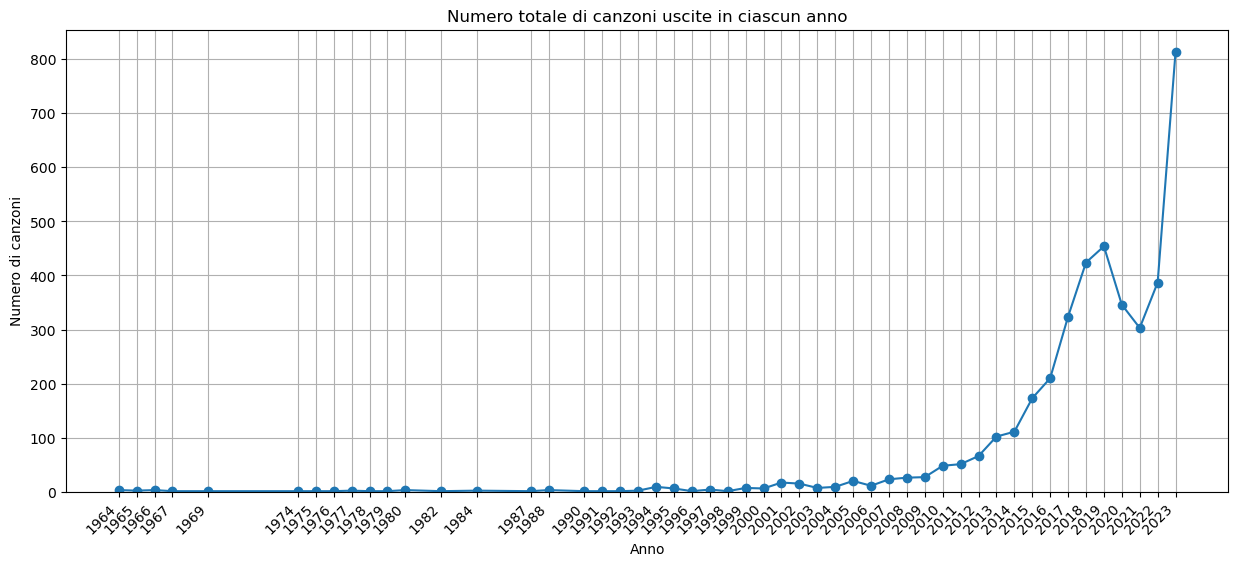

In [29]:
plt.figure(figsize=(15,6))
plt.plot(canzoni_per_anno.index, canzoni_per_anno, marker='o')
plt.title('Numero totale di canzoni uscite in ciascun anno')
plt.xlabel('Anno')
plt.ylabel('Numero di canzoni')

plt.xticks(rotation=45, ha='right') # ha = horizontal alignment
plt.xticks(canzoni_per_anno.index)

plt.gca().set_ylim(bottom=0) # gca = get current axes. Usato per utilizzare metodi custom. Utilizzo di set_ylim per settare un limite all'asse y

plt.grid(True)

plt.show()

Da questa analisi possiamo osservare dei periodi di tempo in cui il numero di canzoni rilasciate è aumentato e diminuito subito dopo. Notiamo poi un arco di tempo che va dall'anno 2009 al 2019 in cui i rilasci di canzoni sono solo aumentati, per poi diminuire nel 2020 e nel 2021, e risalire nuovamente negli ultimi due anni. L'ultimo anno, ossia il 2023, è l'anno con maggiori rilasci di canzoni. 

-------------------------------------------------------------------------------------------------------

A questo punto, analizziamo ciascun decennio per poter visualizzare i generi musicali e gli artisti con maggiore popolarità. Utilizziamo dei grafici per osservare i risultati in modo piuù evidente e preciso.

Cominciamo con il creare una nuova colonna chiamata 'Decennio' in cui inseriamo ciascun decennio calcolato con la formula sottostante. Procediamo con il raggruppamento prima per decennio e generi musicali, poi per decennio e dati degli artisti. Di seguito, calcoliamo la popolarità totale per ciascun genere e artista. Infine, identifichiamo il genere e l'artista puìiù famoso per ogni decennio.

In [40]:
# Creo una nuova colonna per il decennio
merged_dataset['Decennio'] = (merged_dataset['Release Date'].dt.year // 10) * 10

# Raggruppo per decennio e genere. Calcolo poi la popolarità totale per ciascun genere
genere_decennio_popularity = merged_dataset.groupby(['Decennio', 'Genres'])['Popularity_y'].sum().reset_index()

# Raggruppo per decennio e artista. Calcolo poi la popolarità totale per ciascun artista
artista_decennio_popularity = merged_dataset.groupby(['Decennio', 'Name'])['Popularity_y'].sum().reset_index()

# Identifico il genere più famoso per decennio
most_famous_genre_per_decade = genere_decennio_popularity.loc[genere_decennio_popularity.groupby('Decennio')['Popularity_y'].idxmax()]

# Identifico l'artista più famoso per decennio
most_famous_artist_per_decade = artista_decennio_popularity.loc[artista_decennio_popularity.groupby('Decennio')['Popularity_y'].idxmax()]

print("Genere più famoso per decennio:")
print(most_famous_genre_per_decade[['Decennio', 'Genres', 'Popularity_y']])
print("\nArtista più famoso per decennio:")
print(most_famous_artist_per_decade[['Decennio', 'Name', 'Popularity_y']])


Genere più famoso per decennio:
     Decennio                                             Genres  Popularity_y
1        1960  ['classic girl group', 'classic soul', 'disco'...           567
3        1970              ['classic rock', 'glam rock', 'rock']           431
4        1980                            ['bolero', 'latin pop']           314
8        1990  ['beatlesque', 'britpop', 'madchester', 'perma...           541
39       2000                               ['dance pop', 'pop']           619
292      2010                                            ['pop']          6686
534      2020                                            ['pop']          5426

Artista più famoso per decennio:
     Decennio          Name  Popularity_y
1        1960  The Supremes           567
3        1970         Queen           431
5        1980   Luis Miguel           314
16       1990         Oasis           541
41       2000        Juanes           528
385      2010  XXXTENTACION           842
424     

Analizziamo nel dettaglio le operazioni eseguite precedentemente. Inizialmente abbiamo raggruppato il dataframe (usando il merged_dataset) per Decennio e Genres/Name, rispettivamente generi musicali per la prima operazione e nome dell'artista per la seconda. Abbiamo utilizzato 'Popularity_y' per poter associare i generi e gli artisti ad un determinato decennio, calcolato utilizzando la colonna 'Release Year', ossia l'anno estratto dalla colonna 'Release Date' presente originariamente nel file 'Top_Songs_US.csv'. 

Successivamente, per quanto riguarda per esempio l'operazione dedicata all'artista più famoso per decennio, i punteggi della 'Popularity_y' al'interno di ciascun gruppo (combinazione decennio-artista) vengono sommati tramite la funzione 'sum'. Questo passaggio calcola il punteggio totale di popolarità per ciascun artista all'interno di un decennio specifico, considerando i punteggi di popolarità di tutte le canzoni associate a quell'artista in quel particolare decennio. 

La funzione 'reset_index()'' viene utilizzata per reimpostare l'indice del dataframe risultante. Questa operazione non è strettamente necessaria per la funzionalità, ma può rendere il dataframe più leggibile, specialmente se si prevede di utilizzare l'indice successivamente.

Infine, l'operazione 'groupby' viene applicata nuovamente nell'operazione di identificazione dell'artista o genere più famoso, raggruppando il dataframe per 'Decennio' e identificando l'indice corrispondente al massimo valore di 'Popularity_y' all'interno di ogni decennio. Il metodo 'loc' viene quindi utilizzato per selezionare le righe corrispondenti a questi valori massimi, identificando efficacemente l'artista più famoso per ogni decennio in base ai punteggi di popolarità sommati. La medesima funzione è stata applicata per il genere più popolare di ciascun decennio.

Utilizziamo dei grafici

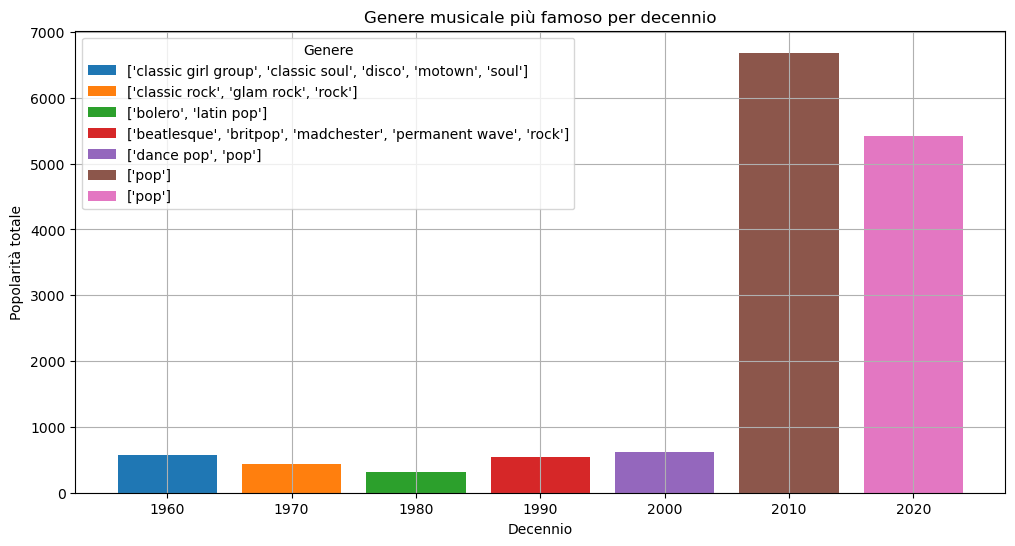

In [75]:
# Plot del genere più famoso per decennio
plt.figure(figsize=(12, 6))
for Decennio, group in most_famous_genre_per_decade.groupby('Decennio'):
    plt.bar(str(Decennio), group['Popularity_y'].iloc[0], label=group['Genres'].iloc[0])

plt.title('Genere musicale più famoso per decennio')
plt.xlabel('Decennio')
plt.ylabel('Popolarità totale')
plt.legend(title='Genere')
plt.grid(True)
plt.show()

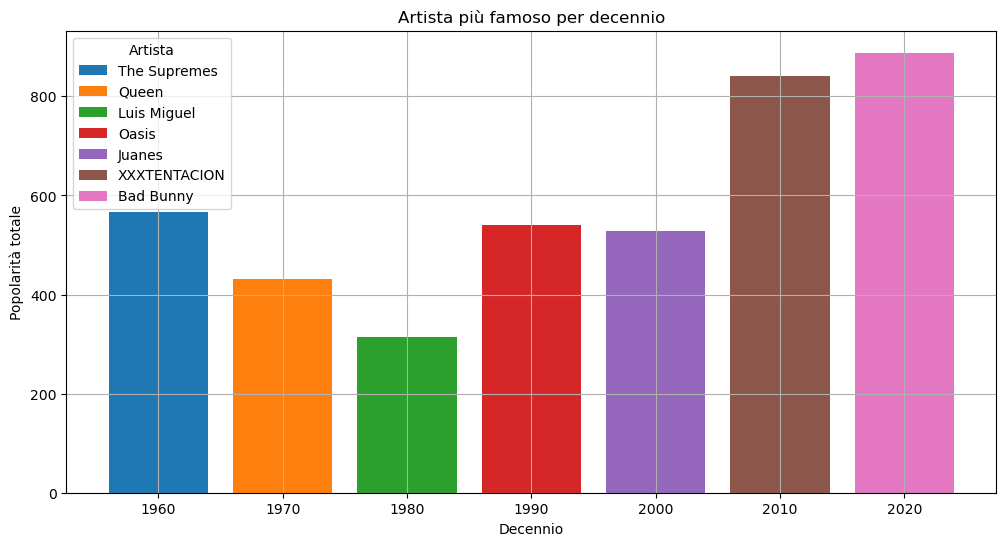

In [71]:
# Plot dell'artista più famoso per decennio
plt.figure(figsize=(12, 6))
for Decennio, group in most_famous_artist_per_decade.groupby('Decennio'):
    plt.bar(str(Decennio), group['Popularity_y'].iloc[0], label=group['Name'].iloc[0])

plt.title('Artista più famoso per decennio')
plt.xlabel('Decennio')
plt.ylabel('Popolarità totale')
plt.legend(title='Artista')
plt.grid(True)
plt.show()


Dall'osservazione dei grafici possiamo notare delle contraddizioni in alcuni decenni. Infatti, notiamo che, nell'ultimo decennio, l'artista più popolare è Bad Bunny, mentre il genere musicale più famoso è il pop, nonostante non risulti essere lo stesso genere musicale dell'artista più famoso. Bad Bunny ha come generi 'reggaeton', 'trap latino' e 'urbano latino', dunque il 'pop' non figura. Altri esempi sono l'incoerenza tra il genere più popolare del decennio 2000 e l'artista più famoso dello stesso periodo, che risultano essere rispettivamente 'dance pop' e 'pop' e Juanes, i cui generi in realtà sono 'colombian pop', 'latin pop', 'mexican pop' e 'rock en espanol', e l'artista più popolare del decennio 2010 e il genere più famoso dello stesso periodo, che sono rispettivamente XXXTENTACION e 'pop', nonstante questo artista abbia 'emo rap', 'miami hip hop' e 'rap' come generi musicali.

Da questa analisi possiamo dedurre che non sempre il genere più popolare è associato all'artista più famoso di uno stesso periodo. Diversi possono essere i motivi per cui questo accade. Per esempio, si può pensare ad un'ambiguità di genere. Prendiamo in considerazione il decennio 2020 che vede il pop come genere più popolare e Bad Bunny come l'artista più famoso; possiamo considerare la definizione del pop come ampia e inclusiva, che comprende una varietà di stili musicali. Se la musica di Bad Bunny è popolare tra un pubblico eterogeneo, potrebbe essere classificata come pop in senso generale, nonostante egli non sia etichettato tradizionalmente come artista pop. La sua musica, infatti, può incorporare elementi di vari generi, portando ad associazioni con categorie più ampie come il pop.

---------------------------------------------------------------------------------

Andiamo ad analizzare ora nello specifico quali sono le canzoni più popolari in ciascun decennio per vedere se sono presenti contraddizioni come nel caso precedente. Questa analisi evidenzia la natura complessa della popolarità musicale, sottolineando l'importanza di considerare sia le dinamiche a livello di artista/genere che a livello di canzone per ottenere una comprensione completa delle tendenze musicali attraverso i decenni.

Per farlo, utilizziamo le stesse operazioni usate precedentemente.

In [73]:
merged_dataset['Decennio'] = (merged_dataset['Release Date'].dt.year // 10) * 10
canzone_decennio_popularity = merged_dataset.groupby(['Decennio', 'Artist Name','Track Name'])['Popularity_y'].sum().reset_index()

most_popular_song_decennio = canzone_decennio_popularity.loc[canzone_decennio_popularity.groupby('Decennio')['Popularity_y'].idxmax()]

print("Canzone più popolare per decennio:")
print(most_popular_song_decennio[['Decennio','Track Name','Popularity_y', 'Artist Name']])


Canzone più popolare per decennio:
      Decennio                           Track Name  Popularity_y  \
8         1960                 You Can't Hurry Love            76   
12        1970  Don't Stop Me Now - Remastered 2011            76   
19        1980              Ahora Te Puedes Marchar            82   
44        1990      All I Want for Christmas Is You            99   
82        2000                               Yellow            92   
1911      2010                                 idfc           152   
2056      2020                          PERRO NEGRO            97   

       Artist Name  
8     The Supremes  
12           Queen  
19     Luis Miguel  
44    Mariah Carey  
82        Coldplay  
1911     blackbear  
2056     Bad Bunny  


Vediamo i risultati in un grafico

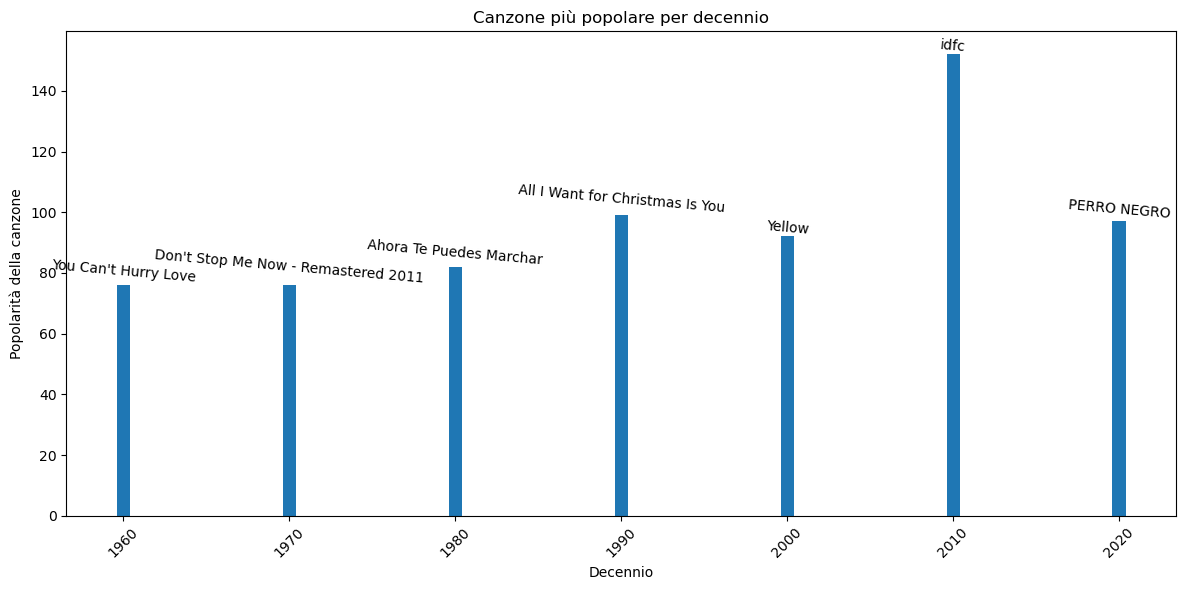

In [76]:
plt.figure(figsize=(12,6))
graph = plt.bar(most_popular_song_decennio['Decennio'], most_popular_song_decennio['Popularity_y'])
plt.title('Canzone più popolare per decennio')
plt.xlabel('Decennio')
plt.ylabel('Popolarità della canzone')
plt.xticks(rotation=45)

# aggiungiamo delle label su ogni barra del grafico per riportare il nome completo della canzone
for bar, song_title in zip(graph, most_popular_song_decennio['Track Name']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), song_title, ha='center', va='bottom', rotation=-5) # va = vertical alignment

plt.tight_layout()
plt.show()

Nel dettaglio, notiamo che delle discrepanze si celano nei decenni del 1990, del 2000 e del 2010. La canzone nominata 'All I Want for Christmas Is You' fu rilasciata nel 1994 dall'artista Mariah Carey, e non dal gruppo Oasis. Lo stesso vale per le canzoni 'Yellow' e 'idfc' che sono state rilasciate rispettivamente nel 2000 e nel 2015 dal gruppo Coldplay e dall'artista blackbear. Per i restanti valori, osserviamo una corrispondenza tra l'artista e il nome della canzone più popolare.

In questa analisi, abbiamo osservato un fenomeno interessante in cui, nei casi citati precedentemente, gli artisti associati alle canzoni più popolari differivano da quelli identificati come i più popolari nelle operazioni precedenti. Diversi fattori potrebbero contribuire a questa disparità. Un aspetto chiave è che la popolarità di una canzone non dipende solo dalla popolarità complessiva dell'artista. Le dinamiche della popolarità musicale sono complesse e le singole canzoni potrebbero ottenere un ampio plauso per vari motivi come melodie uniche, testi, impatto culturale o collaborazioni.

È importante riconoscere che mentre la popolarità complessiva di un artista comprende il suo intero lavoro, la popolarità delle singole canzoni è influenzata da caratteristiche specifiche che risuonano con un determinato pubblico durante certi periodi di tempo. Pertanto, le canzoni che hanno qualità uniche possono emergere in un dato decennio, anche se gli artisti coinvolti non sono sempre i più popolari in tutti i parametri.
Inoltre, i cambiamenti nelle tendenze musicali, nelle preferenze degli ascoltatori e nei fattori esterni come i cambiamenti culturali possono contribuire alla variazione delle canzoni più popolari rispetto alla popolarità complessiva dell'artista.

Per quanto riguarda gli anni 90, l'inaspettato dominio della canzone dell'artista Mariah Carey sottolinea il fascino unico e senza tempo della musica a tema natalizio che può trascendere le tipiche associazioni di genere o artisti [1]. Allo stesso modo, la prevalenza della canzone del gruppo Coldplay negli anni 2000 evidenzia l'influenza globale di alcune tracce che risuonano universalmente [2][3], indipendentemente dalla popolarità generale dell'artista. Analogamente, il dominio della canzone dell'artista blackbear negli anno 2010 sottolinea il potenziale per le singole tracce di connettersi con un pubblico specifico in potenti modi[4]. 

-----------------------------------------------------------------------------------

Come ultima analisi, concentriamoci su quali fattori possono influenzare maggiormente la popolarità degli artisti. Per popolarità intendiamo sia la popolarità in sè sia il numero di followers. 

In [77]:
encoded_dataframe = pd.get_dummies(artisti_no_nan[['Country', 'Genres']])
numerical_features = pd.concat([encoded_dataframe, artisti_no_nan[['Age', 'Popularity']]], axis=1)

In [78]:
correlation_matrix = numerical_features.corr()

Utilizziamo un grafico heat map per osservare i risultati delle precedenti operazioni

In [80]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=5, yticklabels=5)

KeyboardInterrupt: 

Per prima cosa, analizziamo la correlazione tra il paese di origine e la popolarità in sè, dunque utilizzando la colonna 'Popularity'.

In [44]:
correlation_2 = artisti_no_nan['Country'].astype('category').cat.codes.corr(artisti_no_nan['Popularity'])
correlation_2

0.10439312908632518

In [45]:
correlation_2 = artisti_no_nan['Country'].astype('category').cat.codes.corr(artisti_no_nan['Followers'])
correlation_2

0.059143973006651654

Vediamo che nel secondo caso, il coefficiente di popolarità è più basso se utilizziamo il numero dei followers degli artisti. Invece, nel primo caso, utilizzando la popolarità, notiamo un valore più alto. Possiamo dedurre che nel primo caso, sebbene sia comunque un valore basso, il paese di origine possa essere considerato un fattore che influenza la popolarità di un certo artista, di più rispetto al numero dei followers.

--------------------------------------------------------------------------------------

In [46]:
artisti_no_nan['num_genres'] = artisti_no_nan['Genres'].str.split(',').apply(lambda x: len(x))
correlation_3 = artisti_no_nan['num_genres'].corr(artisti_no_nan['Followers'])
correlation_3

C:\Users\User\AppData\Local\Temp\ipykernel_22408\247056648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artisti_no_nan['num_genres'] = artisti_no_nan['Genres'].str.split(',').apply(lambda x: len(x))


0.17075520215140141

In [47]:
artisti_no_nan['num_genres'] = artisti_no_nan['Genres'].str.split(',').apply(lambda x: len(x))
correlation_3 = artisti_no_nan['num_genres'].corr(artisti_no_nan['Popularity'])
correlation_3

C:\Users\User\AppData\Local\Temp\ipykernel_22408\196208160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artisti_no_nan['num_genres'] = artisti_no_nan['Genres'].str.split(',').apply(lambda x: len(x))


0.42262780928038707

In questo caso, osserviamo un valore più alto nella seconda operazione, in cui viene considerata la popolarità invece del numero di followers. Notiamo che certi generi musicali possono essere associati con una popolarità elevata. Ciò vuol dire che, artisti di un certo genere musicale possono avere una popolarità più alta rispetto ad artisti che appartengono ad un genere diverso. Questo specifico fattore è quello con valore più elevato, perciò potrebbe trattarsi di quello che influisce maggiormente sulla popolarità di un artista.

FONTI UTILIZZATE NELLE CONCLUSIONI:
[1] - https://www.ksl.com/article/50815039/why-mariah-careys-all-i-want-for-christmas-is-you-became-so-popular--and-stayed-that-way#:~:text=%22All%20I%20Want%20for%20Christmas%20is%20You%22%20works%20as%20a,works%20narratively%2C%22%20Bennett%20says.
[2] - https://www.bbc.com/news/av/uk-wales-53410309 Coldplay: How Chris Martin created hit Yellow (article + video).
[3] - https://auralcrave.com/en/2022/03/08/the-meaning-of-coldplays-yellow-a-song-of-inexplicable-sensations/
[4] - https://oldtimemusic.com/the-meaning-behind-the-song-idfc-by-blackbear/#:~:text=3.-,Why%20did%20Idfc%20become%20so%20popular%3F,relate%20to%20the%20feelings%20expressed. '3. Why did Idfc become so popular?'.